## Approach of the problem
* Load the libraries and images
* visualize the image
* Declare the Sequential model
* Declare layer
    * Convolution(Filter , stride, shape)
    * pooling (Max/Avg, stride, shape)
    * Flatten()
    * Dense layer(Number of neurons , Activation factor)
    * output layer(Activation, Output shape)
* Compile the model (Optimize,loss function )
* Fit the model (Dataset,Epochs, Batch size)
* Model Evaluation

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset -p ./covid19_image_dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
 99% 157M/158M [00:09<00:00, 18.9MB/s]
100% 158M/158M [00:09<00:00, 17.9MB/s]


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [4]:
train_dir = '/content/covid19_image_dataset/Covid19-dataset/train'
test_dir = '/content/covid19_image_dataset/Covid19-dataset/test'

In [5]:
train_dataset = image_dataset_from_directory(train_dir,batch_size=64,class_names=['Covid', 'Normal', 'Viral Pneumonia'], image_size=(512,512), seed=123)
test_dataset = image_dataset_from_directory(test_dir,batch_size=64,class_names=['Covid', 'Normal', 'Viral Pneumonia'], image_size=(512,512), seed=123)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [6]:
class_names= train_dataset.class_names
class_names

['Covid', 'Normal', 'Viral Pneumonia']

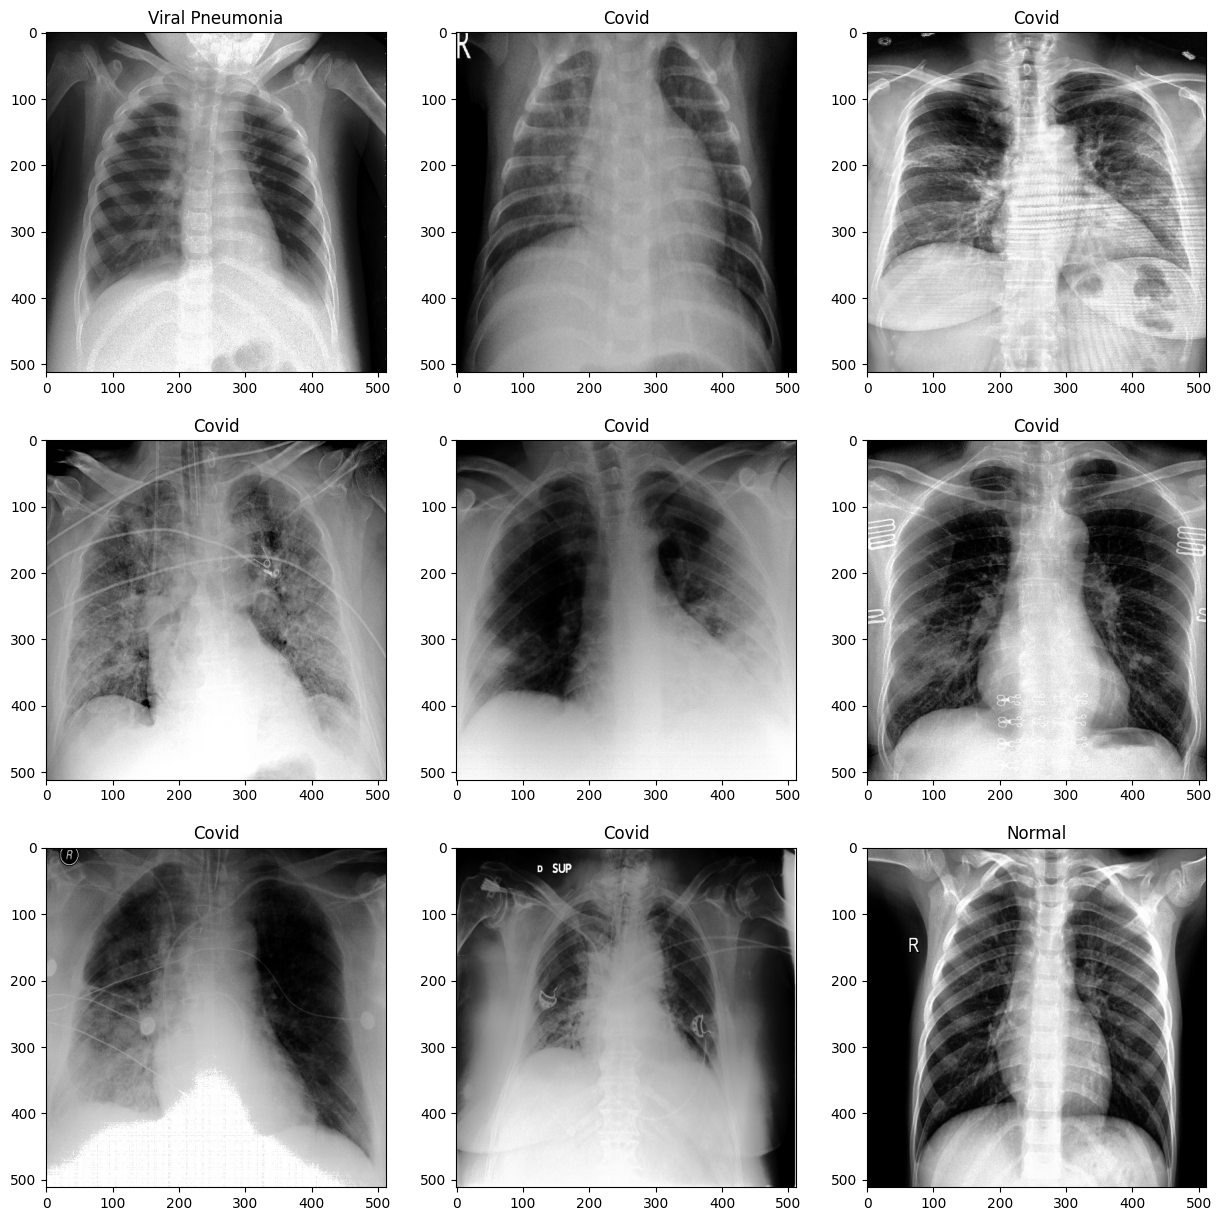

In [7]:
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])


## Declare the model

In [8]:
model = Sequential()

In [9]:
#Block 1
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(512,512,3))) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
#Block 2
model.add(Conv2D(64, 3, padding='same', activation='relu')) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
#Block 3
model.add(Conv2D(128, 3, padding='same', activation='relu')) #Convolution layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2))) #Pooling layer
################ CLASSIFICATION LAYER #########################
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 512, 512, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 256, 256, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      67,108,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,202,369 (256.36 MB)

 Trainable params: 67,202,369 (256.36 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
hist = model.fit(train_dataset,epochs=10,validation_data = test_dataset,batch_size=16)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 90s 18s/step - accuracy: 0.4101 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.4217 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4477 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4384 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4696 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4519 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3972 - loss: 0.0000e+00 - val_accuracy: 0.3939 - val_loss: 0.0000e+00
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4420 - loss: 0.0000e+00 - val_

## Model evaluation

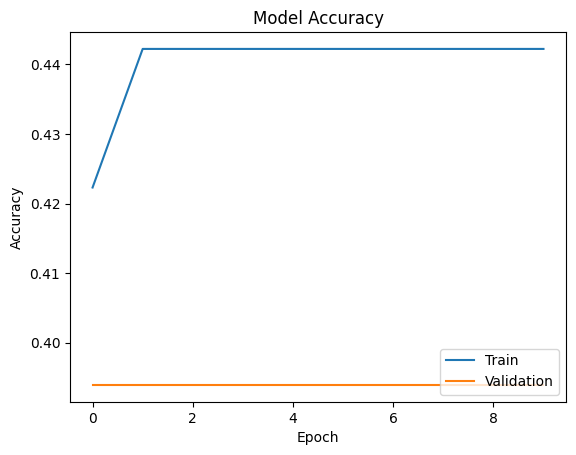

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

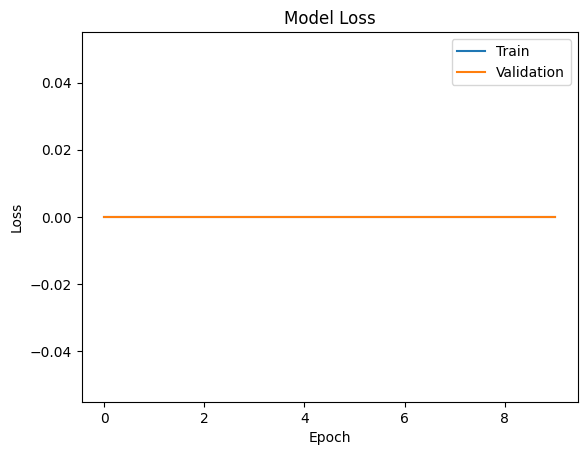

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [15]:
def model_eval(actual,predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(class_rep)


In [17]:
y_hat_train = model.predict(train_dataset)
y_hat_test = model.predict(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step


In [18]:
y_true_train = np.array([label.numpy() for _, labels in train_dataset for label in labels])
model_eval(y_true_train,y_hat_train.round())

The accuracy of the model is: 0.44
[[111   0   0]
 [ 70   0   0]
 [ 70   0   0]]
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       111
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00        70

    accuracy                           0.44       251
   macro avg       0.15      0.33      0.20       251
weighted avg       0.20      0.44      0.27       251



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
y_true_test = np.array([label.numpy() for _, labels in test_dataset for label in labels])
model_eval(y_true_test,y_hat_test.round())

The accuracy of the model is: 0.39
[[26  0  0]
 [20  0  0]
 [20  0  0]]
              precision    recall  f1-score   support

           0       0.39      1.00      0.57        26
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20

    accuracy                           0.39        66
   macro avg       0.13      0.33      0.19        66
weighted avg       0.16      0.39      0.22        66



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
TestDataGenerator = ImageDataGenerator(rescale=1/255)

TrainDataGenerator = ImageDataGenerator(rescale=1/255,zoom_range=0.15,rotation_range=12, height_shift_range=0.05,width_shift_range=0.05)


In [28]:
train_dataset = TrainDataGenerator.flow_from_directory(train_dir,target_size = (512, 512),batch_size = 16,class_mode = "categorical")

Found 251 images belonging to 3 classes.


In [29]:
test_dataset = TestDataGenerator.flow_from_directory(test_dir,target_size = (512, 512), batch_size = 1,class_mode = "categorical")

Found 66 images belonging to 3 classes.


In [30]:
model = Sequential()
#Block1
#convolution layer
model.add(Conv2D(16,3,padding='same',activation='relu',input_shape=(512,512,3)))

#poolin layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#Block 2
#convolution layer
model.add(Conv2D(32,3,padding='same',activation='relu'))

#poolin layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


#flatten layer
model.add(Flatten())

#fully connected layer
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 512, 512, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 256, 256, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      67,108,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 67,114,467 (256.02 MB)

 Trainable params: 67,114,467 (256.02 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
hist = model.fit(train_dataset,epochs=10,validation_data = test_dataset,batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3886 - loss: 28.9991 - val_accuracy: 0.6515 - val_loss: 1.0808
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 780ms/step - accuracy: 0.6637 - loss: 1.3621 - val_accuracy: 0.7121 - val_loss: 0.7626
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 790ms/step - accuracy: 0.8313 - loss: 0.3606 - val_accuracy: 0.7424 - val_loss: 0.7921
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 762ms/step - accuracy: 0.8711 - loss: 0.3355 - val_accuracy: 0.8182 - val_loss: 0.7221
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 731ms/step - accuracy: 0.9056 - loss: 0.2480 - val_accuracy: 0.6818 - val_loss: 0.8678
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 755ms/step - accuracy: 0.8793 - loss: 0.2951 - val_accuracy: 0.8788 - val_loss: 0.6917
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 775ms/step - accuracy: 0.8585 - loss: 0.3215 - val_accuracy: 0.8030 - val_loss: 0.8129
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 768ms/step - accuracy: 0.9082 - loss: 0.2248 - val_accuracy: 0.8636 